<a href="https://colab.research.google.com/github/subratgouda000/My-Project/blob/main/Copy_of_Heart_Failure_Prediction_Using_ANN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/heart.csv')
print("🔹 Dataset Loaded Successfully!")
data.head(10)

🔹 Dataset Loaded Successfully!


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
num_cols = []
for column in data.columns:
  if ((data[column].dtype != 'object') & (data[column].nunique() > 2)):
    num_cols.append(column)
print(num_cols)

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


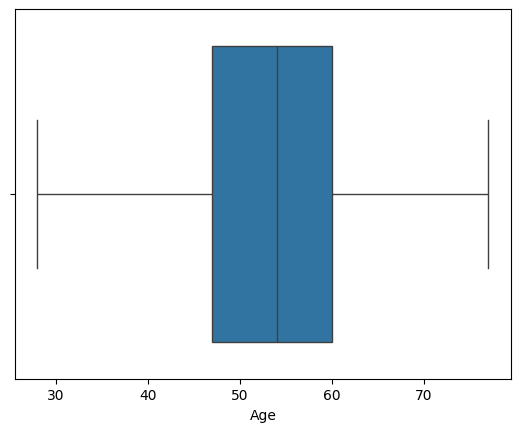

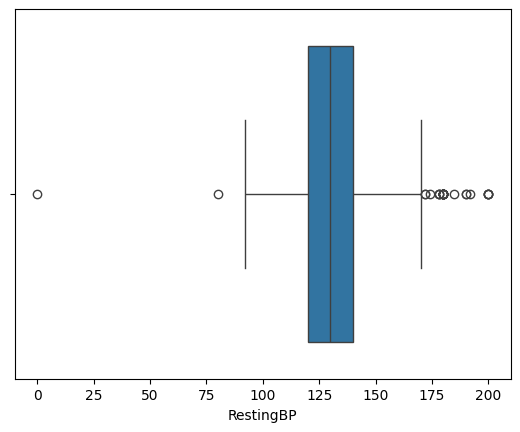

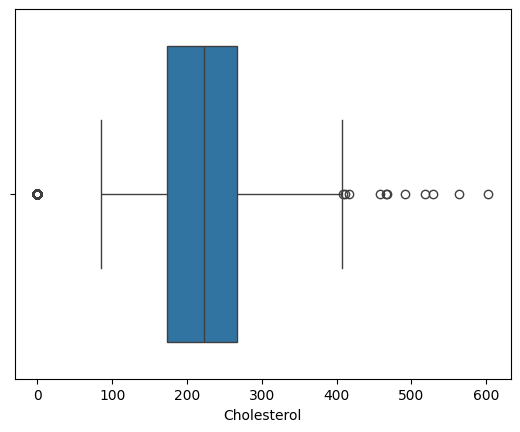

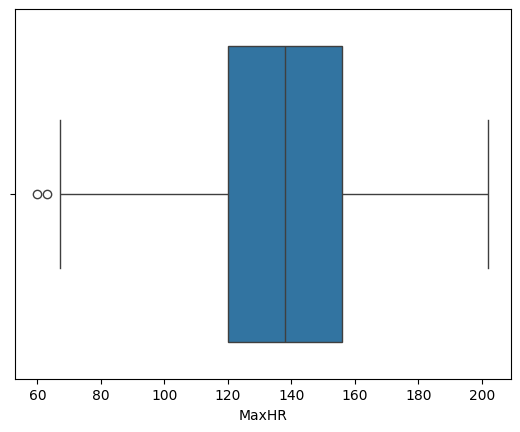

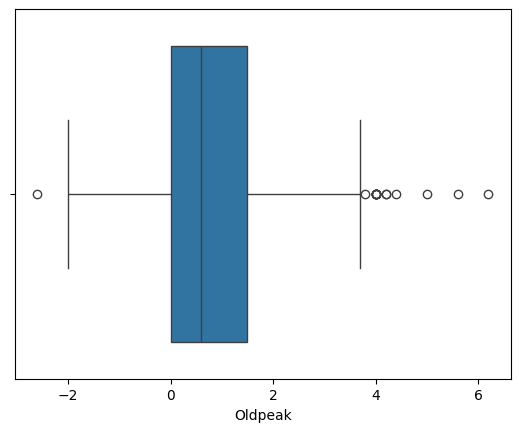

In [ ]:
for column in num_cols:
  sns.boxplot(data=data[column], orient='h')
  plt.xlabel(column)
  plt.show()

In [ ]:
for column in num_cols:
  q3, q1 = np.percentile(data[column], [75, 25])
  IQR = q3 - q1
  max_boxPlot = q3 + (1.5 * IQR)
  min_boxPlot = q1 - (1.5 * IQR)
  data = data[(data[column] > min_boxPlot) & (data[column] < max_boxPlot)]

In [ ]:
data.shape

(690, 12)

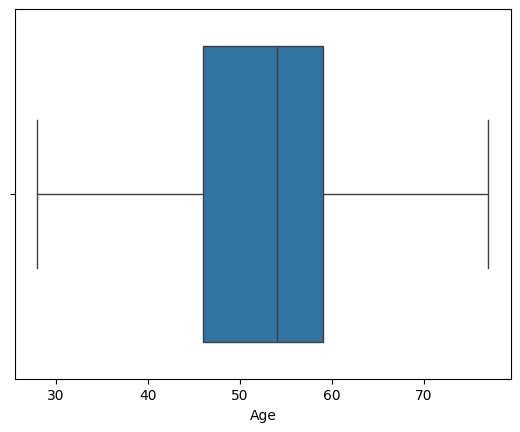

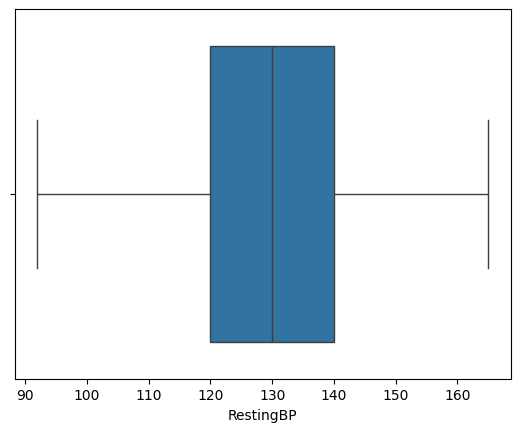

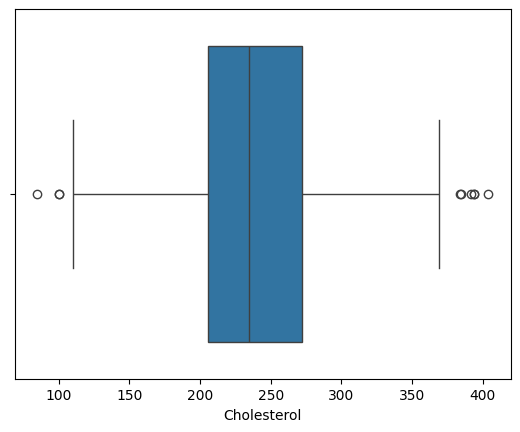

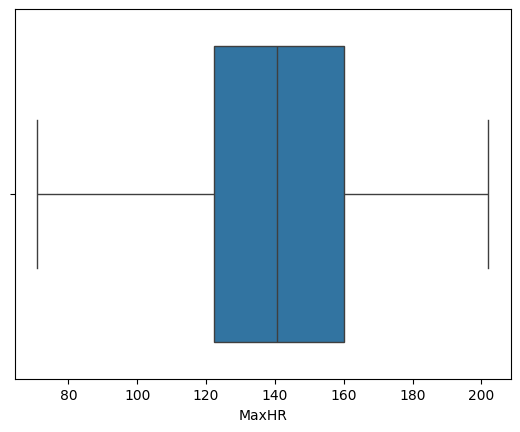

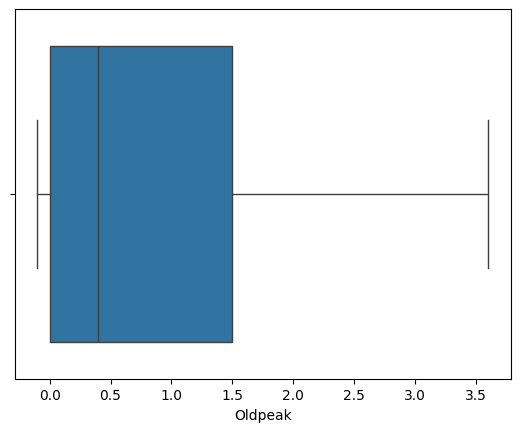

In [ ]:
for column in num_cols:
  sns.boxplot(data=data[column], orient='h')
  plt.xlabel(column)
  plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             690 non-null    int64  
 1   Sex             690 non-null    object 
 2   ChestPainType   690 non-null    object 
 3   RestingBP       690 non-null    int64  
 4   Cholesterol     690 non-null    int64  
 5   FastingBS       690 non-null    int64  
 6   RestingECG      690 non-null    object 
 7   MaxHR           690 non-null    int64  
 8   ExerciseAngina  690 non-null    object 
 9   Oldpeak         690 non-null    float64
 10  ST_Slope        690 non-null    object 
 11  HeartDisease    690 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 70.1+ KB


In [ ]:
(data.isnull().sum())

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
cat_cols = data.select_dtypes(include='object').columns
cat_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

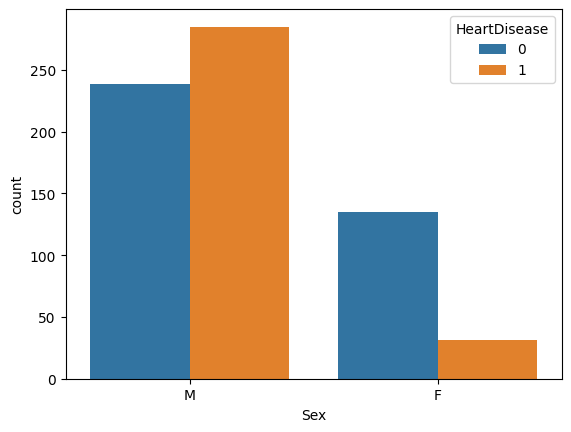

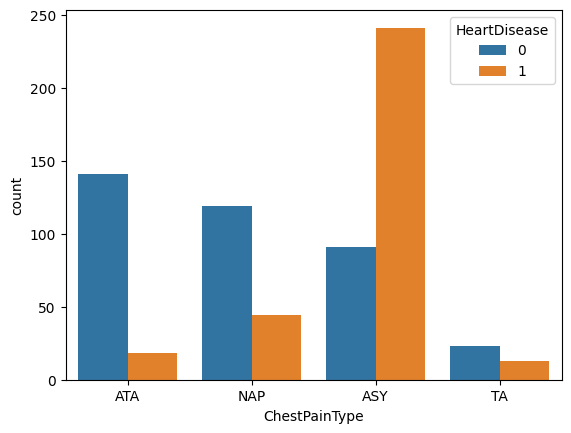

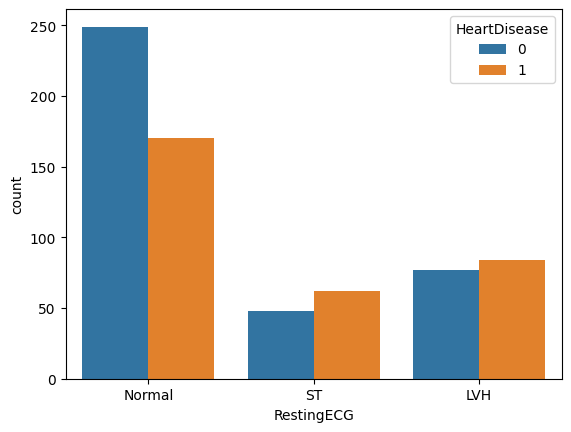

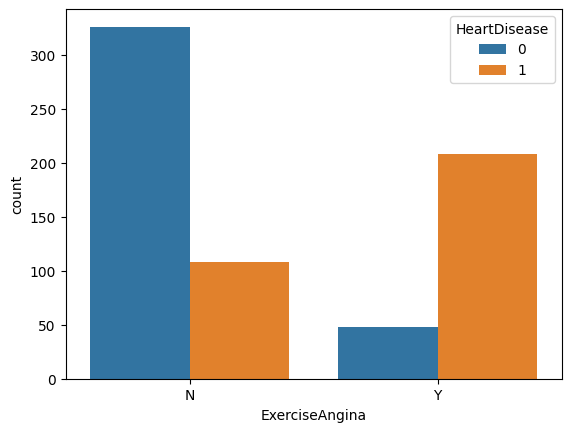

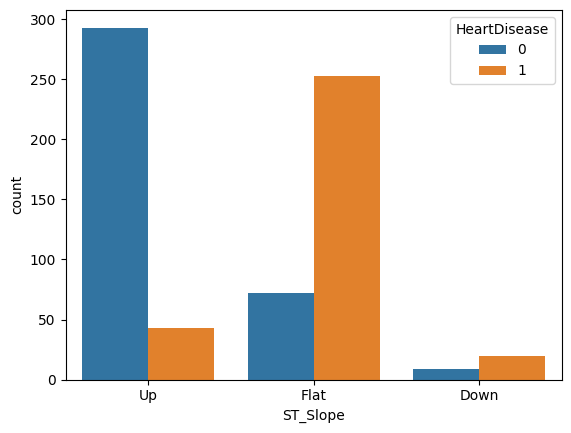

In [ ]:
for column in cat_cols:
  sns.countplot(data=data, x=column, hue="HeartDisease")
  plt.show()

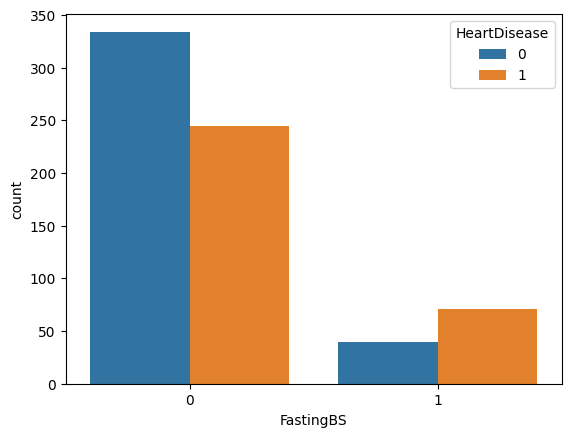

In [ ]:
sns.countplot(data=data, x="FastingBS", hue="HeartDisease")
plt.show()

In [ ]:
data['HeartDisease'].value_counts()

,count
HeartDisease,
0,374
1,316


In [ ]:
encoded_data = pd.get_dummies(data, drop_first=True)
# Convert boolean columns to integers (0/1)
encoded_data = encoded_data.astype(int)
print("\n🎨 One-Hot Encoding Applied!")
print(encoded_data.head())


🎨 One-Hot Encoding Applied!
   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172        0             0   
1   49        160          180          0    156        1             1   
2   37        130          283          0     98        0             0   
3   48        138          214          0    108        1             1   
4   54        150          195          0    122        0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0      1                  1                  0                 0   
1      0                  0                  1                 0   
2      1                  1                  0                 0   
3      0                  0                  0                 0   
4      1                  0                  1                 0   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                  1              0    

In [ ]:
encoded_data.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
5,39,120,339,0,170,0,0,1,0,1,0,1,0,0,0,1
6,45,130,237,0,170,0,0,0,1,0,0,1,0,0,0,1
7,54,110,208,0,142,0,0,1,1,0,0,1,0,0,0,1
8,37,140,207,0,130,1,1,1,0,0,0,1,0,1,1,0
9,48,120,284,0,120,0,0,0,1,0,0,1,0,0,0,1


In [ ]:
data.shape

(690, 12)

In [ ]:
# Split into features and target
x = encoded_data.drop('HeartDisease', axis=1)
y = encoded_data['HeartDisease']


In [ ]:
# Train/test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
# Convert back to DataFrame for readability (optional)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5035 - loss: 0.6850 - val_accuracy: 0.7477 - val_loss: 0.6199
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7351 - loss: 0.6110 - val_accuracy: 0.8288 - val_loss: 0.5461
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8081 - loss: 0.5347 - val_accuracy: 0.8288 - val_loss: 0.4654
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8481 - loss: 0.4624 - val_accuracy: 0.8468 - val_loss: 0.4128
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8439 - loss: 0.4230 - val_accuracy: 0.8559 - val_loss: 0.3695
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8483 - loss: 0.3965 - val_accuracy: 0.8559 - val_loss: 0.3538
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8481 - loss: 0.3657 - val_accuracy: 0.8559 - val_loss: 0.3414
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8363 - loss: 0.3823 - val_accuracy: 0.8559 - val_loss: 0.3358
E

<ipython-input-34-5e9ba4b9239c>:40: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-5e9ba4b9239c>:40: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


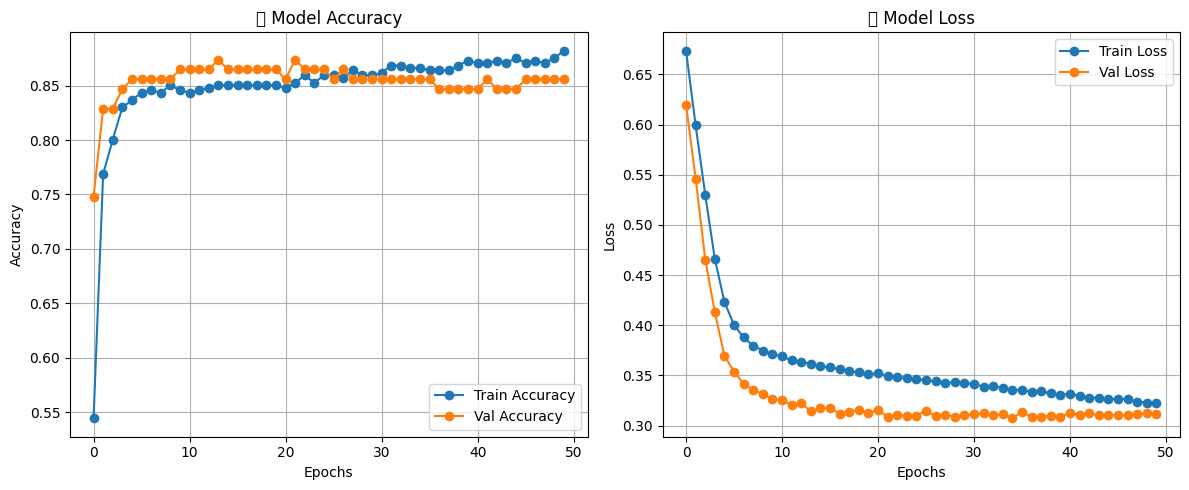

In [ ]:
# ANN Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(16, input_shape=(x_train.shape[1],), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=16)

# Evaluate
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}, Accuracy: {accuracy * 100:.2f}%")# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('📈 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('📉 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


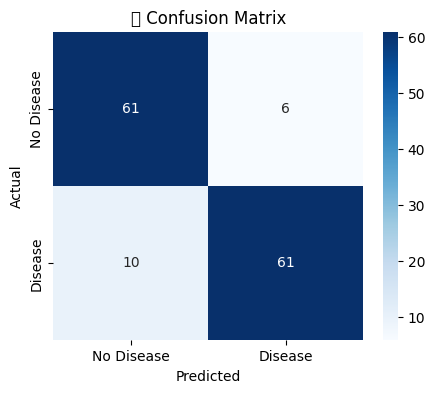

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88        67
           1       0.91      0.86      0.88        71

    accuracy                           0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.89      0.88      0.88       138



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test set
y_pred_prob = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Display Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🧾 Confusion Matrix")
plt.show()

# Print Classification Report
print("📊 Classification Report:\n", cr)


In [ ]:
# Save model and scaler
model.save('/content/heart_failure_prediction_model.h5')
import joblib
joblib.dump(scaler, '/content/heart_scaler.save')

['/content/heart_scaler.save']

In [ ]:
import pandas as pd
import tensorflow as tf
import joblib
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load saved model and scaler
model = tf.keras.models.load_model('/content/heart_failure_prediction_model.h5')
scaler = joblib.load('/content/heart_scaler.save')

# Get feature list
feature_columns = pd.read_csv('/content/heart.csv')
encoded_columns = pd.get_dummies(feature_columns, drop_first=True).astype(int)
x_columns = encoded_columns.drop('HeartDisease', axis=1).columns.tolist()

# In-memory users DB
users_db = {}

def login_screen():
    clear_output()
    print("🔐 Heart Failure Predictor - Login")

    username = widgets.Text(description="Username:")
    password = widgets.Password(description="Password:")
    login_btn = widgets.Button(description="Login", button_style='success')
    register_btn = widgets.Button(description="Register", button_style='info')

    def do_login(b):
        if users_db.get(username.value) == password.value:
            print("✅ Login successful!")
            input_form_ui()
        else:
            print("❌ Invalid credentials.")

    def do_register(b):
        if username.value in users_db:
            print("⚠️ Username already exists.")
        else:
            users_db[username.value] = password.value
            print("✅ Registered. Please login.")

    login_btn.on_click(do_login)
    register_btn.on_click(do_register)

    display(username, password, login_btn, register_btn)

def input_form_ui():
    clear_output()
    print("📥 Enter Patient Data for Prediction")

    # Mandatory inputs
    age = widgets.IntText(description="Age*", value=50)
    bp = widgets.IntText(description="RestingBP*", value=120)
    chol = widgets.IntText(description="Cholesterol*", value=200)
    fbs = widgets.Dropdown(options=[0, 1], description="FastingBS*")
    hr = widgets.IntText(description="MaxHR*", value=150)
    oldpeak = widgets.FloatText(description="Oldpeak*", value=1.0)

    # Optional dummy variables
    sex_m = widgets.Dropdown(description="Sex_M", options=[0, 1])
    cp_na = widgets.Dropdown(description="CP_Non-Anginal", options=[0, 1])
    ecg_normal = widgets.Dropdown(description="ECG_Normal", options=[0, 1])
    ex_angina = widgets.Dropdown(description="Exercise_Y", options=[0, 1])
    slope_up = widgets.Dropdown(description="ST_Slope_Up", options=[0, 1])
    slope_flat = widgets.Dropdown(description="ST_Slope_Flat", options=[0, 1])

    predict_btn = widgets.Button(description="🔍 Predict", button_style='primary')

    def make_prediction(b):
        input_dict = {
            'Age': age.value, 'RestingBP': bp.value, 'Cholesterol': chol.value,
            'FastingBS': fbs.value, 'MaxHR': hr.value, 'Oldpeak': oldpeak.value,
            'Sex_M': sex_m.value, 'ChestPainType_Non-anginal pain': cp_na.value,
            'RestingECG_Normal': ecg_normal.value, 'ExerciseAngina_Y': ex_angina.value,
            'ST_Slope_Up': slope_up.value,
            'ST_Slope_Flat': slope_flat.value,
            # Defaults for dummies not selected
            'ChestPainType_Asymptomatic': 0,
            'ChestPainType_Typical angina': 0,
            'RestingECG_LVH': 0 ,
            'RestingECG_ST': 0
        }

        # Ensure input matches trained features
        input_df = pd.DataFrame([input_dict])
        # Reindex with trained feature columns, filling missing values with 0
        input_df = input_df.reindex(columns=x_columns, fill_value=0)

        # Scale and predict
        input_scaled = scaler.transform(input_df)
        pred = model.predict(input_scaled)[0][0]

        # Show result
        result = "💔 High Risk" if pred > 0.5 else "💓 Low Risk"
        print(f"\n🧠 Prediction: {pred:.2f} → {result}")

    predict_btn.on_click(make_prediction)

    print("🟧 Mandatory Inputs:")
    display(age, bp, chol, fbs, hr, oldpeak)
    print("🟨 Optional Inputs:")
    display(sex_m, cp_na, ecg_normal, ex_angina, slope_up, slope_flat, predict_btn)

# 🚀 Launch App
login_screen()

📥 Enter Patient Data for Prediction
🟧 Mandatory Inputs:


IntText(value=50, description='Age*')

IntText(value=120, description='RestingBP*')

IntText(value=200, description='Cholesterol*')

Dropdown(description='FastingBS*', options=(0, 1), value=0)

IntText(value=150, description='MaxHR*')

FloatText(value=1.0, description='Oldpeak*')

🟨 Optional Inputs:


Dropdown(description='Sex_M', options=(0, 1), value=0)

Dropdown(description='CP_Non-Anginal', options=(0, 1), value=0)

Dropdown(description='ECG_Normal', options=(0, 1), value=0)

Dropdown(description='Exercise_Y', options=(0, 1), value=0)

Dropdown(description='ST_Slope_Up', options=(0, 1), value=0)

Dropdown(description='ST_Slope_Flat', options=(0, 1), value=0)

Button(button_style='primary', description='🔍 Predict', style=ButtonStyle())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step

🧠 Prediction: 0.74 → 💔 High Risk
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

🧠 Prediction: 0.67 → 💔 High Risk
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

🧠 Prediction: 0.67 → 💔 High Risk
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

🧠 Prediction: 0.66 → 💔 High Risk
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

🧠 Prediction: 0.60 → 💔 High Risk
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

🧠 Prediction: 0.56 → 💔 High Risk
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

🧠 Prediction: 0.72 → 💔 High Risk
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

🧠 Prediction: 0.59 → 💔 High Risk
